## K-Means  ##

In this tutorial we shall be focussing on the K-Means technique for Clustering similar objects. A formal definition of K-Means is as follows- “Given a collection of objects each with n measurable attributes, k-means is an analytical technique that, for a chosen value of k, identifies k clusters of objects based on the objects’ proximity to the centre of the k groups. The centre is determined as the arithmetic mean of each cluster’s n-dimensional vector of attributes ”


## Example - 1 ##
### Random Plot ###

Let us start with a random 2-D plot to build the intuition.

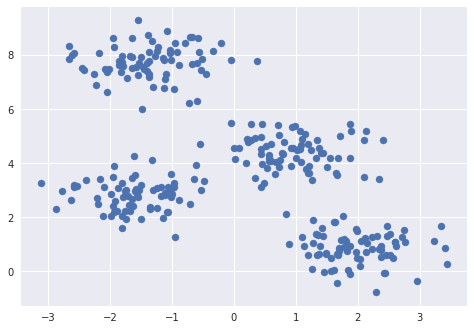

In [8]:
import sklearn
import warnings

%matplotlib inline
import matplotlib.pyplot as plt

plt.style.use('seaborn') # pretty matplotlib plots
plt.rc('font', size=14)
plt.rc('figure', titlesize=18)
plt.rc('axes', labelsize=10)
plt.rc('axes', titlesize=15)

#pd.options.display.float_format = '{:,.0f}'.format 
import pandas as pd
pd.options.display.float_format = '{:,.3f}'.format #upto 3 decimal points


from sklearn.datasets.samples_generator import make_blobs
X, y_true = make_blobs(n_samples=300, centers=4, #you can increase samples and cluster centers here..
                       cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);

### Run K Means Cluster ###

In [9]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=7) #you can play with the cluster numbers here...
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

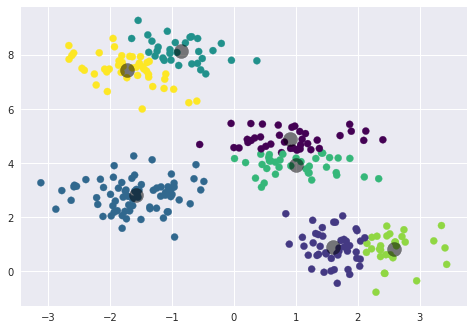

In [10]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

## Example - 2 ##

Here we shall run K-Means on the dataset shared in the note

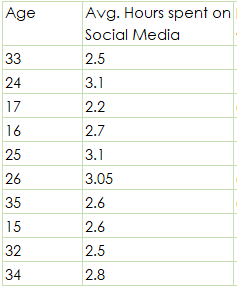

The goal is to create clusters based on age and avg. hours spent on social media.

### Data Extract ###

#### Loading the data to Python ####

In [65]:
#Extracting CSV from local/shared drive
k_means_tutorial = pd.read_csv('https://raw.githubusercontent.com/Dass-pe/DataSciencePE/master/k_means_example_2.csv'
                             ,names = ['age', 'avg_hrs'], skiprows = 1)
k_means_tutorial.head(5)

,age,avg_hrs
0,33,2.500
1,24,3.100
2,17,2.200
3,16,2.700
4,25,3.100


#### Shape of the Dataset ####

In [66]:
k_means_tutorial.shape

(10, 2)

#### Scatter plot ####

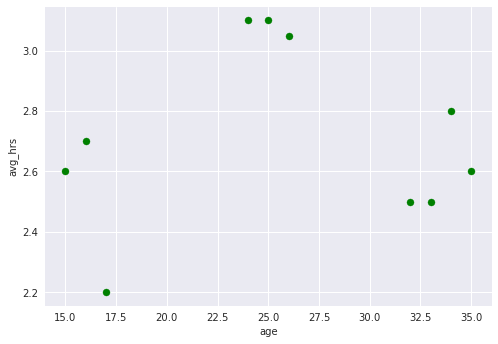

In [67]:
k_means_tutorial.plot.scatter(x= 'age', y = 'avg_hrs', c= 'green', s = 50)

### Standardise the data ###

In [68]:
import pandas as pd 

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler 
  
# standardize the data attributes
X_std = preprocessing.scale(k_means_tutorial)

In [69]:
X_std

array([[ 0.99701102, -0.76002105],
       [-0.23218065,  1.36096792],
       [-1.18821861, -1.82051553],
       [-1.32479546, -0.05302472],
       [-0.0956038 ,  1.36096792],
       [ 0.04097306,  1.18421884],
       [ 1.27016472, -0.40652288],
       [-1.46137231, -0.40652288],
       [ 0.86043416, -0.76002105],
       [ 1.13358787,  0.30047344]])

### Optimal Number of Clusters  ###

#### Scree Plot ####

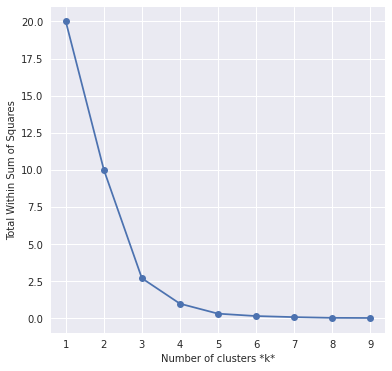

In [70]:
# Run the Kmeans algorithm and get the index of data points clusters
sse = []
list_k = list(range(1, 10))

for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(X_std)
    sse.append(km.inertia_)

# Plot sse against k
plt.figure(figsize=(6, 6))
plt.plot(list_k, sse, '-o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Total Within Sum of Squares');


### K - Means Algorithm ###

In [71]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
kmeans.fit(X_std)
y_kmeans = kmeans.predict(X_std)

#### Plot the clusters ####

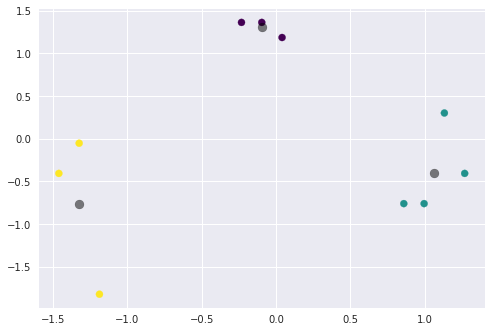

In [72]:
plt.scatter(X_std[:, 0], X_std[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=80, alpha=0.5);

#### Cluster Centers #### 

In [73]:
centers

array([[-0.0956038 ,  1.30205156],
       [ 1.06529944, -0.40652288],
       [-1.32479546, -0.76002105]])

### Silhouette Analysis ### 

For n_clusters = 2 The average silhouette_score is : 0.46059124631555903
For n_clusters = 3 The average silhouette_score is : 0.6705978823086148
For n_clusters = 4 The average silhouette_score is : 0.6813266150090775


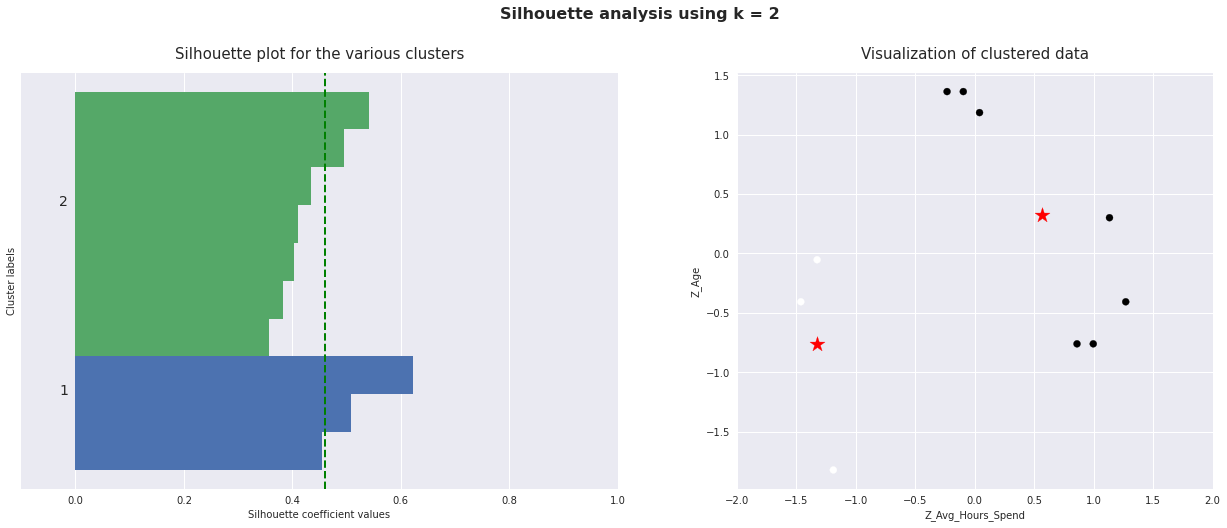

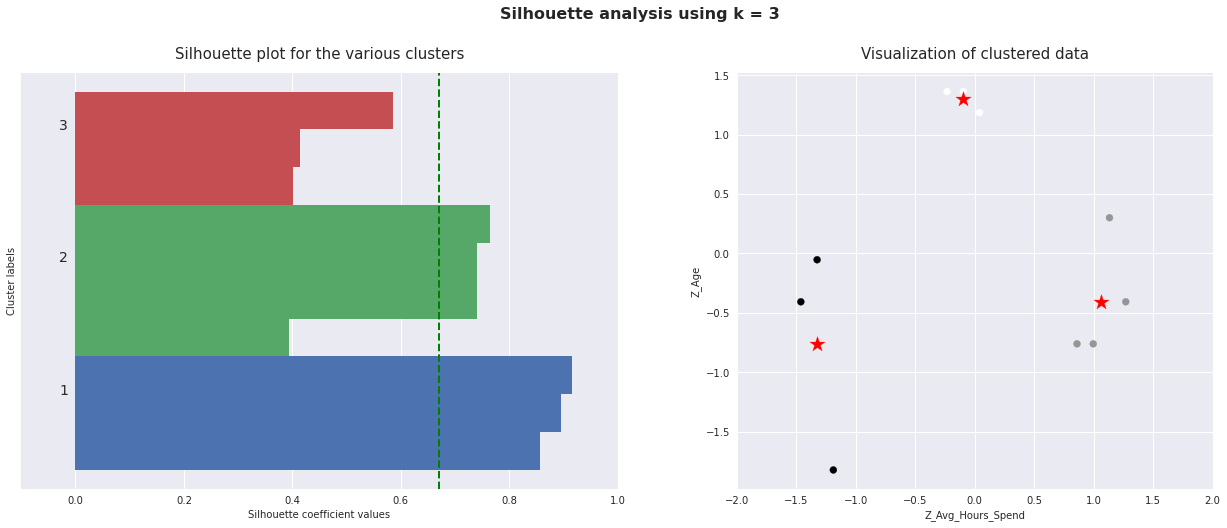

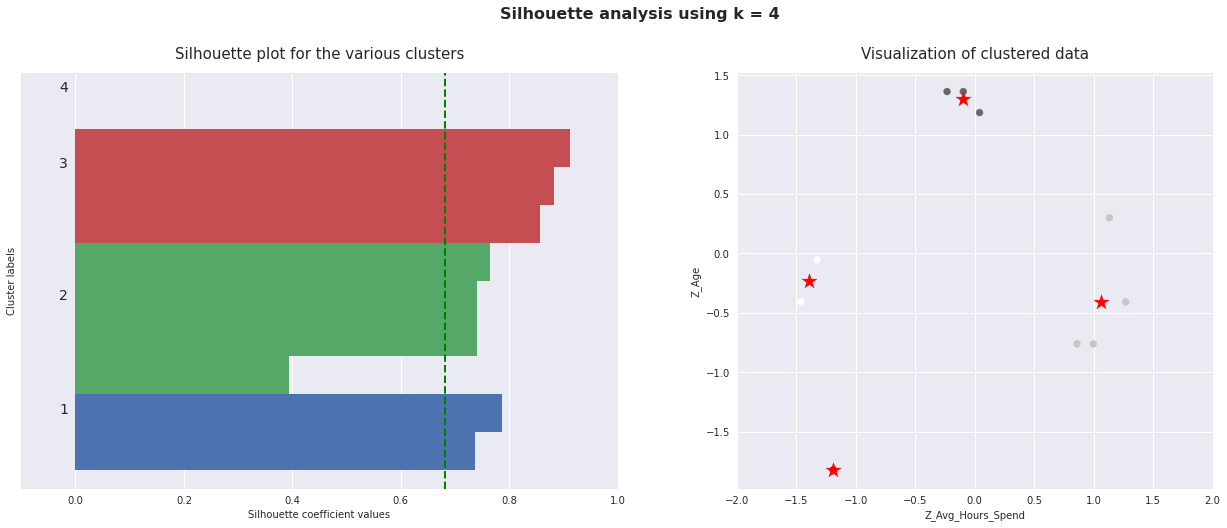

In [74]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
import numpy as np

for i, k in enumerate([2, 3, 4]):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
    
    # Run the Kmeans algorithm
    km = KMeans(n_clusters=k)
    labels = km.fit_predict(X_std)
    centroids = km.cluster_centers_

    # Get silhouette samples
    silhouette_vals = silhouette_samples(X_std, labels)

    silhouette_avg = silhouette_score(X_std, labels)
    print("For n_clusters =", k,
          "The average silhouette_score is :", silhouette_avg)


    # Silhouette plot
    y_ticks = []
    y_lower, y_upper = 0, 0
    for i, cluster in enumerate(np.unique(labels)):
        cluster_silhouette_vals = silhouette_vals[labels == cluster]
        cluster_silhouette_vals.sort()
        y_upper += len(cluster_silhouette_vals)
        ax1.barh(range(y_lower, y_upper), cluster_silhouette_vals, edgecolor='none', height=1)
        ax1.text(-0.03, (y_lower + y_upper) / 2, str(i + 1))
        y_lower += len(cluster_silhouette_vals)

    # Get the average silhouette score and plot it
    avg_score = np.mean(silhouette_vals)
    ax1.axvline(avg_score, linestyle='--', linewidth=2, color='green')
    ax1.set_yticks([])
    ax1.set_xlim([-0.1, 1])
    ax1.set_xlabel('Silhouette coefficient values')
    ax1.set_ylabel('Cluster labels')
    ax1.set_title('Silhouette plot for the various clusters', y=1.02);
    
    # Scatter plot of data colored with labels
    #the below part only works for 2-dimensional data i.e when we only use 2 variables for the clustering exercise
    ax2.scatter(X_std[:, 0], X_std[:, 1], c=labels)
    ax2.scatter(centroids[:, 0], centroids[:, 1], marker='*', c='r', s=250)
    ax2.set_xlim([-2, 2])
    ax2.set_xlim([-2, 2])
    ax2.set_xlabel('Z_Avg_Hours_Spend')
    ax2.set_ylabel('Z_Age')
    ax2.set_title('Visualization of clustered data', y=1.02)
    ax2.set_aspect('equal')
    plt.tight_layout()
    plt.suptitle(f'Silhouette analysis using k = {k}',
                 fontsize=16, fontweight='semibold', y=1.05);

## Example 3: k-means for colour compression ##

One interesting application of clustering is in color compression within images. For example, imagine you have an image with millions of colors. In most images, a large number of the colors will be unused, and many of the pixels in the image will have similar or even identical colors.

For example, consider the image shown in the following figure, which is from the Scikit-Learn datasets module (for this to work, you'll have to have the pillow Python package installed).

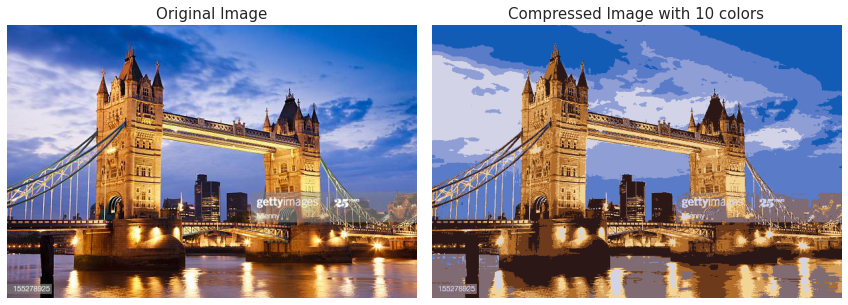

In [14]:
# Note: this requires the ``pillow`` package to be installed
from sklearn import datasets
from sklearn.datasets import load_sample_image
from skimage.io import imread
from sklearn.cluster import KMeans
import numpy as np

# Read the image
img = imread('https://media.gettyimages.com/photos/london-uk-tower-bridge-at-river-thames-sunset-twilight-scene-picture-id155278925?s=612x612')
img_size = img.shape

# Reshape it to be 2-dimension
X = img.reshape(img_size[0] * img_size[1], img_size[2])

# Run the Kmeans algorithm
km = KMeans(n_clusters=10)
km.fit(X)

# Use the centroids to compress the image
X_compressed = km.cluster_centers_[km.labels_]
X_compressed = np.clip(X_compressed.astype('uint8'), 0, 255)

# Reshape X_recovered to have the same dimension as the original image 128 * 128 * 3
X_compressed = X_compressed.reshape(img_size[0], img_size[1], img_size[2])

# Plot the original and the compressed image next to each other
fig, ax = plt.subplots(1, 2, figsize = (12, 8))
ax[0].imshow(img)
ax[0].set_title('Original Image')
ax[1].imshow(X_compressed)
ax[1].set_title('Compressed Image with 10 colors')
for ax in fig.axes:
    ax.axis('off')
plt.tight_layout();

## Example 4: k-means for iris - dataset ##

**Introduction:** The Iris dataset contains the data for 50 flowers from each of the 3 species - Setosa, Versicolor and Virginica. The data gives the measurements in centimeters of the variables sepal length and width and petal length and width for each of the flowers.

*Goal of the study:* is to perform exploratory analysis on the data and build a K-means clustering model to cluster them into groups. The dataset here has the species column which gives the True Clusters. Here we have assume that we do not have the species column and run a K-Means algorithm not knowing how many clusters should we choose (3 or may be more?) and say we choose 3 clusters, how well does the K-Means algorithm replicate the true clusters.    


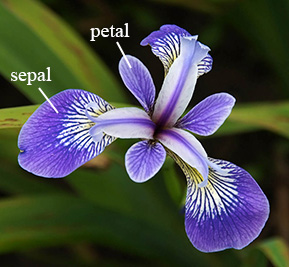


As mentioned, the Iris dataset used in this example already has the cluster Species created. We shall only use this variable to see if our clustering has similar distribution as the flower species. We know that standardisation, removing outliers and tackling multicollinearity (often via PCA) are prerequisites to running a K-Means algorithm. In this example, we shall only standardise the data; outlier detection & PCA will be introduced in Example -5 Clustering Cars problem. Also, Multicollinearity is a bigger issue in high dimensional problems where Euclidean Distance tend to get more inflated in absence of orthogonality. 

In [76]:
#Extracting CSV from local/shared drive
iris_df = pd.read_csv('https://raw.githubusercontent.com/Dass-pe/DataSciencePE/master/iris_k_means.csv'
                      ,skiprows = 0)
iris_df.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.100,3.500,1.400,0.200,Iris-setosa
1,2,4.900,3.000,1.400,0.200,Iris-setosa
2,3,4.700,3.200,1.300,0.200,Iris-setosa
3,4,4.600,3.100,1.500,0.200,Iris-setosa
4,5,5.000,3.600,1.400,0.200,Iris-setosa


### Standardise Data ###

This is the first step before running K-Means. Although you must always do exploratory data analysis and treat missing value etc. first, before doing this. 

In [78]:
iris_df.iloc[:,1:5]

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.100,3.500,1.400,0.200
1,4.900,3.000,1.400,0.200
2,4.700,3.200,1.300,0.200
3,4.600,3.100,1.500,0.200
4,5.000,3.600,1.400,0.200
...,...,...,...,...
145,6.700,3.000,5.200,2.300
146,6.300,2.500,5.000,1.900
147,6.500,3.000,5.200,2.000
148,6.200,3.400,5.400,2.300


In [79]:
import pandas as pd 
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler 
  
    
# standardize the data attributes
iris_std = preprocessing.scale(iris_df.iloc[:,1:5]) #standardising only the numerical variables #check what iloc does...

In [82]:
iris_df[['ZSepalLength', 'ZSepalWidth', 'ZPetalLength', 'ZPetalWidth']] = pd.DataFrame(iris_std)

In [83]:
iris_df.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,ZSepalLength,ZSepalWidth,ZPetalLength,ZPetalWidth
0,1,5.100,3.500,1.400,0.200,Iris-setosa,-0.901,1.032,-1.341,-1.313
1,2,4.900,3.000,1.400,0.200,Iris-setosa,-1.143,-0.125,-1.341,-1.313
2,3,4.700,3.200,1.300,0.200,Iris-setosa,-1.385,0.338,-1.398,-1.313
3,4,4.600,3.100,1.500,0.200,Iris-setosa,-1.507,0.106,-1.284,-1.313
4,5,5.000,3.600,1.400,0.200,Iris-setosa,-1.022,1.263,-1.341,-1.313


### Optimal Number of Clusters - Scree Plot ###

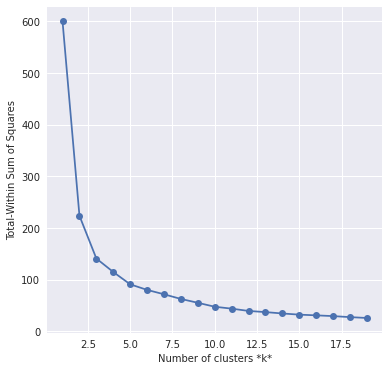

In [84]:
# Run the Kmeans algorithm and get the index of data points clusters
sse = []
list_k = list(range(1, 20))

for k in list_k:
    km = KMeans(n_clusters=k, init = 'k-means++')
    km.fit(iris_df.iloc[:,6:10])
    sse.append(km.inertia_)

# Plot sse against k
plt.figure(figsize=(6, 6))
plt.plot(list_k, sse, '-o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Total-Within Sum of Squares');

**The above scree plot shows that 3 clusters are probably the most optimum choice**

### Run K-Means Algorithm ###

In [85]:
#run the k-means clustering algorithm

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, n_init = 25,  init = 'k-means++') #choosing 3 clusters
kmeans.fit(iris_df.iloc[:,6:10])
ykmeans = kmeans.predict(iris_df.iloc[:,6:10])


iris_df['New_cluster'] = pd.Series(ykmeans, index=iris_df.index) #append the new clusters to the original data frame.

In [86]:
kmeans.cluster_centers_

array([[-0.05021989, -0.88029181,  0.34753171,  0.28206327],
       [-1.01457897,  0.84230679, -1.30487835, -1.25512862],
       [ 1.13597027,  0.09659843,  0.996271  ,  1.01717187]])

In [87]:
iris_df.groupby(['Species']).Id.agg('count')

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Id, dtype: int64

In [88]:
iris_df.groupby(['New_cluster']).Id.agg('count')

New_cluster
0    53
1    50
2    47
Name: Id, dtype: int64

In [89]:
iris_df.groupby(['Species','New_cluster']).Id.agg('count')

Species          New_cluster
Iris-setosa      1              50
Iris-versicolor  0              39
                 2              11
Iris-virginica   0              14
                 2              36
Name: Id, dtype: int64

The discrepancy is clear as new clusters have different objects to the original clusters..

### Accuracy Score ###

Although, being an Unsupervised Learning problem there is no such thing as accuracy score as you wouldnt have classifications to test your results against. However, we have the luxury of knowing what the true categories are in this dataset and would try and check what our accuracy of prediction has been.

In [90]:
#Make sure you name the labels sensibly based on the output you got from the above cell...

iris_df.loc[iris_df['New_cluster'] == 1, 'New_Cluster_Labels'] ='Iris-setosa'
iris_df.loc[iris_df['New_cluster'] == 0, 'New_Cluster_Labels'] ='Iris-versicolor'
iris_df.loc[iris_df['New_cluster'] == 2, 'New_Cluster_Labels'] ='Iris-virginica'
iris_df.head(3)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,ZSepalLength,ZSepalWidth,ZPetalLength,ZPetalWidth,New_cluster,New_Cluster_Labels
0,1,5.100,3.500,1.400,0.200,Iris-setosa,-0.901,1.032,-1.341,-1.313,1,Iris-setosa
1,2,4.900,3.000,1.400,0.200,Iris-setosa,-1.143,-0.125,-1.341,-1.313,1,Iris-setosa
2,3,4.700,3.200,1.300,0.200,Iris-setosa,-1.385,0.338,-1.398,-1.313,1,Iris-setosa


In [91]:
true_species = iris_df.Species
predicted_species = iris_df.New_Cluster_Labels

In [92]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(true_species, predicted_species)

print("Our prediction has an overall accuracy of:", round(accuracy*100, 2),"%")

Our prediction has an overall accuracy of: 83.33 %


### Silhoutte Score ###

For n_clusters = 2 The average silhouette_score is : 0.580184463257396
For n_clusters = 3 The average silhouette_score is : 0.45840087099074767
For n_clusters = 4 The average silhouette_score is : 0.38686030299599405
For n_clusters = 5 The average silhouette_score is : 0.34478573455929096
For n_clusters = 6 The average silhouette_score is : 0.32800245312290494


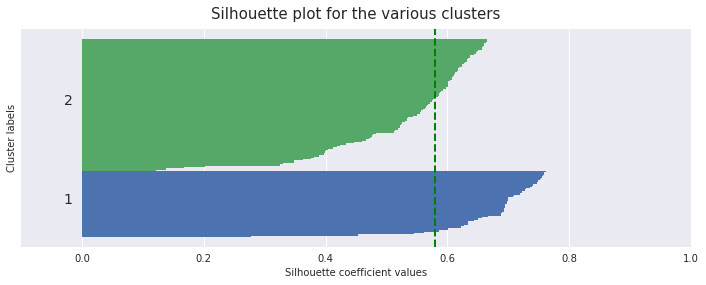

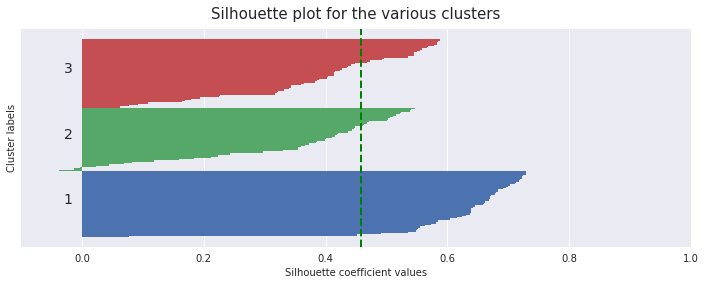

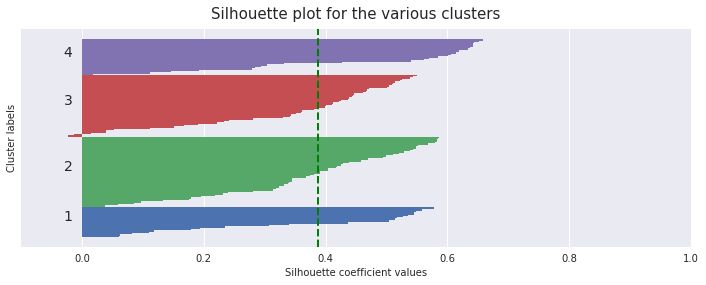

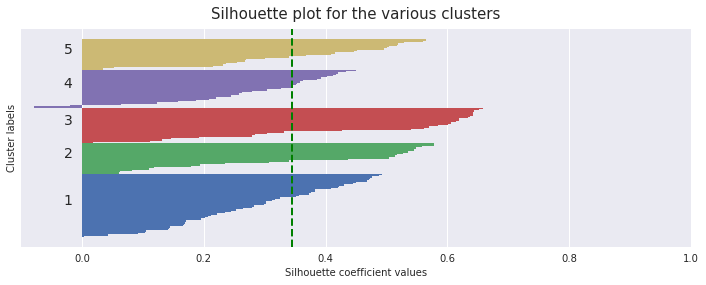

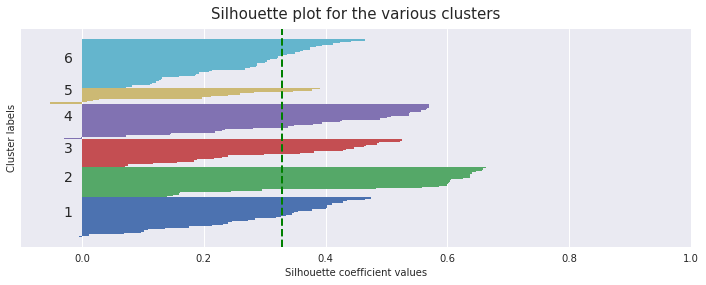

In [93]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

for i, k in enumerate([2, 3, 4, 5, 6]):
    fig, (ax1) = plt.subplots(1)
    fig.set_size_inches(12, 4)
    
    # Run the Kmeans algorithm
    km = KMeans(n_clusters=k)
    labels = km.fit_predict(iris_df.iloc[:,6:10])
    centroids = km.cluster_centers_

    # Get silhouette samples
    silhouette_vals = silhouette_samples(iris_df.iloc[:,6:10], labels)

    silhouette_avg = silhouette_score(iris_df.iloc[:,6:10], labels)
    print("For n_clusters =", k,
          "The average silhouette_score is :", silhouette_avg)


    # Silhouette plot
    y_ticks = []
    y_lower, y_upper = 0, 0
    for i, cluster in enumerate(np.unique(labels)):
        cluster_silhouette_vals = silhouette_vals[labels == cluster]
        cluster_silhouette_vals.sort()
        y_upper += len(cluster_silhouette_vals)
        ax1.barh(range(y_lower, y_upper), cluster_silhouette_vals, edgecolor='none', height=1)
        ax1.text(-0.03, (y_lower + y_upper) / 2, str(i + 1))
        y_lower += len(cluster_silhouette_vals)

    # Get the average silhouette score and plot it
    avg_score = np.mean(silhouette_vals)
    ax1.axvline(avg_score, linestyle='--', linewidth=2, color='green')
    ax1.set_yticks([])
    ax1.set_xlim([-0.1, 1])
    ax1.set_xlabel('Silhouette coefficient values')
    ax1.set_ylabel('Cluster labels')
    ax1.set_title('Silhouette plot for the various clusters', y=1.02);

**The results show that probably 2 clusters have the best separation. However, in reality we know there are 3 species of flowers in the dataset and empahises that techniques like Silhouette tests & Scree plots are only directional**